In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
columns = (
    'mass',
    'redshift',
    'mode_0',
    'mode_1',
    'freq_mode_0',
    'freq_mode_1',
    'tau_mode_0',
    'tau_mode_1',
    'SNR_mode_0',
    'SNR_mode_1',
    'error_A',
    'error_phi_mode_0',
    'error_f_mode_0',
    'error_tau_mode_0',
    'error_R',
    'error_phi_mode_1',
    'error_f_mode_1',
    'error_tau_mode_1'
)
df = {}
for q in [1.5, 10]:
    df[q] = pd.read_csv(f'../data/all_errors/LIGO_q_{q}_all_errors.dat',
                     sep = '\t', comment='#', names = columns, header=None)

In [6]:
columns = (
    'mass',
    'redshift',
    'mode_0',
    'mode_1',
    'freq_mode_0',
    'freq_mode_1',
    'tau_mode_0',
    'tau_mode_1',
    'SNR_mode_0',
    'SNR_mode_1',
    'error_A',
    'error_phi_mode_0',
    'error_f_mode_0',
    'error_tau_mode_0',
    'error_R',
    'error_phi_mode_1',
    'error_f_mode_1',
    'error_tau_mode_1'
)
df = {}
for q in [1.5, 10]:
    df[q] = pd.read_csv(f'../data/all_errors/LIGO_q_{q}_Qfactor.dat',
                     sep = '\t', comment='#', names = columns, header=None)


In [10]:
for q in df:
    df[q] = df[q][df[q].redshift >= 1e-2]

In [ ]:
# measurability criteria
cmaps = {
    '(2,2,1) II': 'Reds',
    '(3,3,0)': 'Greens',
    '(4,4,0)': 'Blues',
    '(2,1,0)': 'Oranges',
}

for q in [1.5,10]:
    for T in [0.1, 0.05, 0.01]:
        fig, ax = plt.subplots(2, figsize = [8,8])
        for mode_1 in ('(2,2,1) II', '(3,3,0)', '(4,4,0)', '(2,1,0)'):
            df_plot = df[q][(df[q]['mode_0']=='(2,2,0)')&(df[q]['mode_1']==mode_1)]
            ax[0].tricontour(df_plot.mass, df_plot.redshift,
                             np.sign(df_plot.error_f_mode_1/df_plot.freq_mode_1-T),
                             cmap = cmaps[mode_1], levels = 0)
            ax[0].set_xscale('log')
            ax[0].set_yscale('log')


            ax[1].tricontour(df_plot.mass, df_plot.redshift,
                             np.sign(df_plot.error_tau_mode_1/df_plot.tau_mode_1-T),
                             cmap = cmaps[mode_1], levels = 0)
            ax[1].set_xscale('log')
            ax[1].set_yscale('log')

        ax[0].set_title(f'T = {T}, q = {q}')
        ax[0].text(11, 0.7, 'frequency')
        ax[1].text(11, 0.7, 'decay time')


<ipython-input-7-36297895c6c2>:23: UserWarning: No contour levels were found within the data range.
  ax[1].tricontour(df_plot.mass, df_plot.redshift,
<ipython-input-7-36297895c6c2>:14: UserWarning: No contour levels were found within the data range.
  ax[0].tricontour(df_plot.mass, df_plot.redshift,


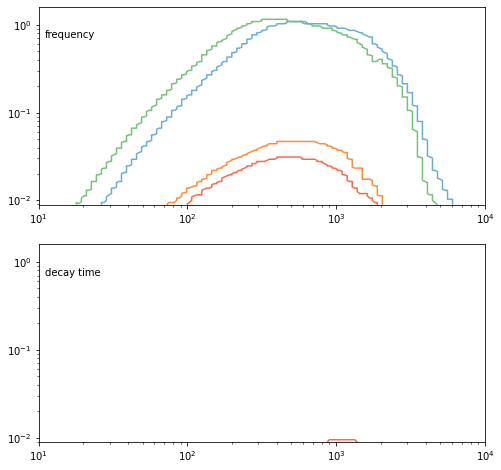

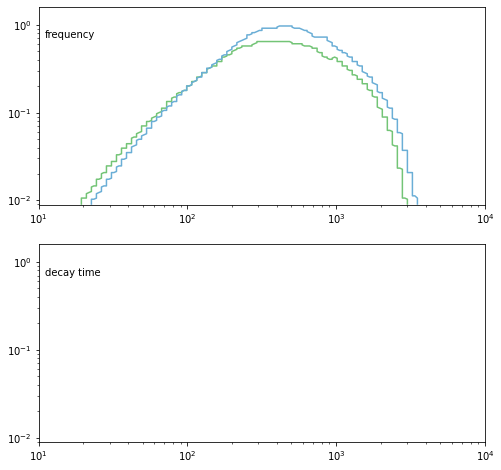

In [7]:
# one rayleigh criterion
cmaps = {
    '(2,2,1) II': 'Reds',
    '(3,3,0)': 'Greens',
    '(4,4,0)': 'Blues',
    '(2,1,0)': 'Oranges',
}


for q in [1.5,10]:
    fig, ax = plt.subplots(2, figsize = [8,8])
    for mode_1 in ('(2,2,1) II', '(3,3,0)', '(4,4,0)', '(2,1,0)'):
        df_plot = df[q][(df[q]['mode_0']=='(2,2,0)')&(df[q]['mode_1']==mode_1)]
        ax[0].tricontour(df_plot.mass, df_plot.redshift,
                         np.sign(np.abs(df_plot.freq_mode_0 - df_plot.freq_mode_1)-
                                 df_plot[["error_f_mode_0", "error_f_mode_1"]].max(axis=1)
                                ),
                         cmap = cmaps[mode_1], levels = 0)
        ax[0].set_xscale('log')
        ax[0].set_yscale('log')


        ax[1].tricontour(df_plot.mass, df_plot.redshift,
                         np.sign(np.abs(df_plot.tau_mode_0 - df_plot.tau_mode_1)-
                                 df_plot[["error_tau_mode_0", "error_tau_mode_1"]].max(axis=1)
                                ),
                          cmap = cmaps[mode_1], levels = 0)

        ax[1].set_xscale('log')
        ax[1].set_yscale('log')

    ax[0].text(11, 0.7, 'frequency')
    ax[1].text(11, 0.7, 'decay time')


<ipython-input-12-ec9b66ecaa54>:13: UserWarning: No contour levels were found within the data range.
  ax.tricontour(df_plot.mass, df_plot.redshift,


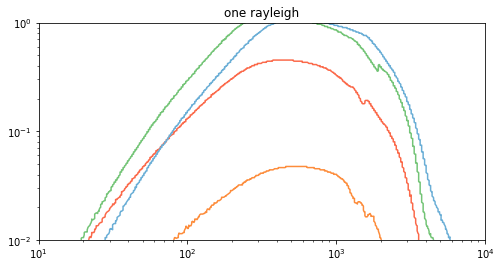

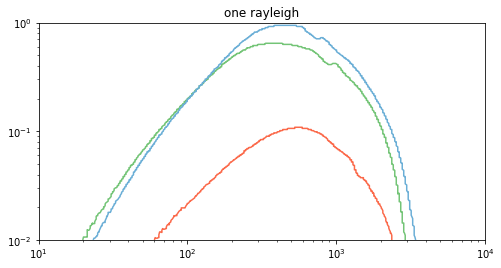

In [12]:
# one rayleigh criterion
cmaps = {
    '(2,2,1) II': 'Reds',
    '(3,3,0)': 'Greens',
    '(4,4,0)': 'Blues',
    '(2,1,0)': 'Oranges',
}

for q in [1.5, 10]:
    fig, ax = plt.subplots(1, figsize = [8,4])
    for mode_1 in ('(2,2,1) II', '(3,3,0)', '(4,4,0)', '(2,1,0)'):
        df_plot = df[q][(df[q]['mode_0']=='(2,2,0)')&(df[q]['mode_1']==mode_1)]
        ax.tricontour(df_plot.mass, df_plot.redshift,
                         np.sign(np.sign(np.abs(df_plot.freq_mode_0 - df_plot.freq_mode_1)-
                                 df_plot[["error_f_mode_0", "error_f_mode_1"]].max(axis=1))
                                 +
                         np.sign(np.abs(df_plot.tau_mode_0 - df_plot.tau_mode_1)-
                                 df_plot[["error_tau_mode_0", "error_tau_mode_1"]].max(axis=1)
                                )+1),
                         cmap = cmaps[mode_1], levels = 0)
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_title('one rayleigh')



<ipython-input-13-44eb93a1ad52>:13: UserWarning: No contour levels were found within the data range.
  ax.tricontour(df_plot.mass, df_plot.redshift,


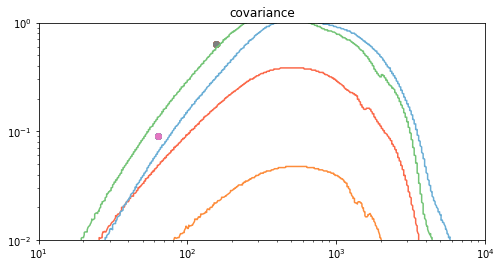

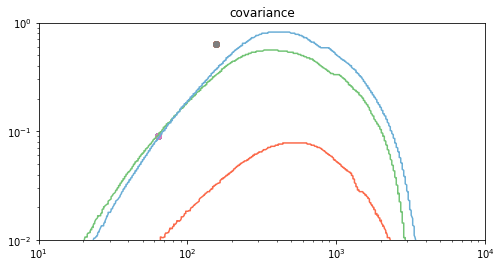

In [13]:
# Distinguishability condition (covariance)
cmaps = {
    '(2,2,1) II': 'Reds',
    '(3,3,0)': 'Greens',
    '(4,4,0)': 'Blues',
    '(2,1,0)': 'Oranges',
}

for q in [1.5, 10]:
    fig, ax = plt.subplots(1, figsize = [8,4])
    for mode_1 in ('(2,2,1) II', '(3,3,0)', '(4,4,0)', '(2,1,0)'):
        df_plot = df[q][(df[q]['mode_0']=='(2,2,0)')&(df[q]['mode_1']==mode_1)]
        ax.tricontour(df_plot.mass, df_plot.redshift,
                         np.sign(((df_plot.freq_mode_0 - df_plot.freq_mode_1)**2)/
                                 (df_plot.error_f_mode_0**2 + df_plot.error_f_mode_1**2)+
                                 ((df_plot.tau_mode_0 - df_plot.tau_mode_1)**2)/
                                 (df_plot.error_tau_mode_0**2 + df_plot.error_tau_mode_1**2)
                                 -1
                                ),
                         cmap = cmaps[mode_1], levels = 0)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.scatter(63.1, 0.09)
        ax.scatter(156.3, 0.64)
    ax.set_title('covariance')


In [21]:
# Measurability as Bayes horizon
horizons_coeffs = {
    1.5: {
#         2: [-0.42378303, 2.22119101, - 2.34699946, - 2.22674388],
#         3: [-0.30219477, 1.38081955, - 0.4938548, - 3.95842648],
        '(2,2,1) II': [-0.66852311,  4.05036508, -6.80452328,  1.26800471],
        '(3,3,0)': [-0.72984323,  4.60837898, -8.3414624,   2.31768849],
        '(4,4,0)': [-0.58874309,  3.88021218, -7.19144783,  1.32087045],
        '(2,1,0)': [-2.21026510e-03, -1.31642774e+00,  7.05973356e+00, -1.10706091e+01],
    },
    10: {
#         2: [-0.11210798, 0.22803465, 3.71644785, -7.29147623],
#         3: [-0.70892573, 4.50109537, -8.15164046, 1.62887952],
        '(2,2,1) II': [-0.86209342, 5.76135278, -11.65082754, 4.88450789],
        '(3,3,0)': [-0.95259347, 6.1709775, -12.13801787, 5.37319762],
        '(4,4,0)': [-1.13283604, 7.85887465, -16.92973514, 9.46422891],
    }
}

masses_range = {
    1.5: {
#         2: [3e1, 5e3],
#         3: [8e1, 4e3],
        '(2,2,1) II': [4e1, 4e3],
        '(3,3,0)': [6.5e1, 4e3],
        '(4,4,0)': [1.5e2, 5e3],
        '(2,1,0)': [1.5e2, 1.5e3],
    },
    10: {
#         2: [6e1, 3.5e3],
#         3: [2e2, 3e3],
        '(2,2,1) II': [1.5e2, 2.5e3],
        '(3,3,0)': [7e1, 2.5e3],
        '(4,4,0)': [1e2, 3e3],
    }
}


In [135]:

df_T = pd.DataFrame()
mass_ratio = 1.5
N_masses = 10
for mode, coeff in horizons_coeffs[mass_ratio].items():
    df_aux = df[(df['mode_0']=='(2,2,0)')&(df['mode_1']== mode)]
    df_aux = df_aux[(df_aux.mass > masses_range[mass_ratio][mode][0])&(df_aux.mass < masses_range[mass_ratio][mode][1])]
    masses = np.array(list(set(df_aux.mass.values)))
    horizon = np.poly1d(coeff)
    redshifts_horizon = 10**horizon(np.log10(masses))
    redshifts = [min(df_aux[(df_aux.redshift>=redshift_horizon)].redshift) for redshift_horizon in redshifts_horizon]
    T_f = []
    T_tau = []
    T_masses = []
    T_redshifts = []
    for i in range(len(masses)):
        df_aux_2 = df_aux[(df_aux.mass == masses[i])&(df_aux.redshift == redshifts[i])]
        if len(df_aux_2) > 0:
            T_masses.append(masses[i])
            T_redshifts.append(redshifts[i])
            
            T_f.append(df_aux_2.error_f_mode_1.values[0]/df_aux_2.freq_mode_1.values[0])
            T_tau.append(df_aux_2.error_tau_mode_1.values[0]/df_aux_2.tau_mode_1.values[0])
        
    df_new = pd.DataFrame(
        {
            'mass': T_masses,
            'redshift': T_redshifts,
            'T_f': T_f,
            'T_tau': T_tau,
            'mode': [mode]*len(T_masses)
        }
    )
    df_T = pd.concat([df_T, df_new])
            

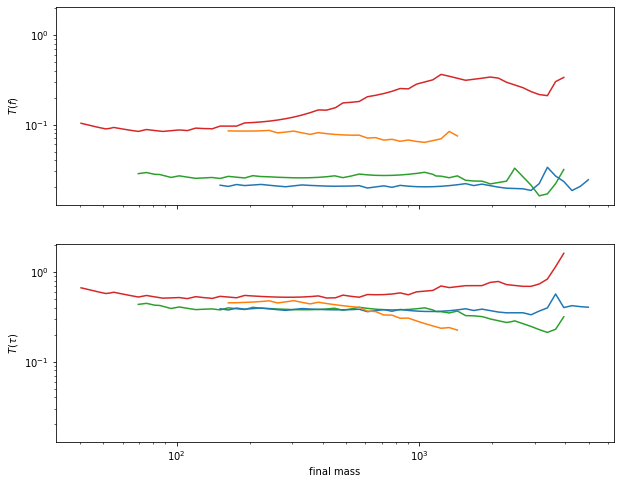

In [143]:
fig, ax = plt.subplots(2, figsize=[10,8], sharex=True, sharey=True)
i = 0
colors = {
    '(2,2,1) II': 'tab:red',
    '(3,3,0)': 'tab:green',
    '(4,4,0)': 'tab:blue',
    '(2,1,0)': 'tab:orange',
}
for mode in colors:
    df_plot = df_T[(df_T['mode'] == mode)]
    df_plot = df_plot.sort_values(by=['mass'])
    ax[0].loglog(df_plot.mass, df_plot.T_f, color = colors[mode])
    ax[0].set_xscale('log')
    ax[0].set_ylabel(r'$T(f)$')
    
    ax[1].loglog(df_plot.mass, df_plot.T_tau, color = colors[mode])
    ax[1].set_xlabel(r'final mass')
    ax[1].set_ylabel(r'$T(\tau)$')
    ax[1].set_xscale('log')
    


In [67]:
df_aux.redshift.values[9]

0.194149194574388

In [78]:
len(redshifts)

40